![](https://i.imgur.com/JsMvGnP.png)

## Projeto de Conclusão de Curso - Data Science
## Aluno: Lucas Nogueira - Turma Maio/2021 - Prof Paulo Sampaio

In [213]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from scikitplot.metrics import plot_confusion_matrix
from sklearn.feature_selection import RFE, SelectKBest, f_classif, mutual_info_classif, chi2
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import shap
shap.initjs()
import xgboost
from xgboost import XGBClassifier
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve, plot_ks_statistic
from catboost import CatBoostRegressor

## Apresentação do Projeto

Link da apresentação: https://docs.google.com/presentation/d/1C1LEE_dkz_A0w9qD1kfL70nJJcpZifcKIDpdIDl2ITg/edit#slide=id.p

## Análise Exploratória de Dados

In [112]:
df = pd.read_csv("base_full3.csv",sep=";")

In [113]:
df

,device_id,max_game_level_D4,days_played_D4,sessions_D4,minutes_played_D4,ganho_sc_D4,game_level_finished_D4,first_position_D4,xp_D4,Classe
0,14b14fef-6c8e-44c3-ac9f-95b8e2a72190,18,4,9,387.90,11717463,85,59,69583,0
1,5414f747-01c6-4aed-aaf2-bfbefcd486ac,7,1,1,101.65,11707549,0,0,0,0
2,553d13ea-1b47-4413-ad2d-352e2b90e6bf,17,3,8,162.42,10993612,33,29,70249,0
3,942899b7-16e3-4374-bece-7852540258a1,10,2,4,151.47,10651162,26,17,18765,0
4,1acc93b5-3533-465c-bc02-02a007f06fce,3,2,2,18.72,10479067,4,1,397,0
...,...,...,...,...,...,...,...,...,...,...
276501,f046aca6-7c09-4391-8ff4-904de8ecceb7,3,2,4,13.33,78,0,0,0,0
276502,609688aa-2dfc-4d4a-821b-fa0f363c7c6b,3,1,1,0.90,77,0,0,0,0
276503,76a0503e-9f51-4a8a-9a57-7d7ef4515dc1,3,1,1,0.00,50,0,0,0,0
276504,600c7ab5-9fb0-4248-acf1-57f90f00d249,5,2,2,3.55,33,0,0,0,0


In [114]:
df.columns

Index(['device_id', 'max_game_level_D4', 'days_played_D4', 'sessions_D4',
       'minutes_played_D4', 'ganho_sc_D4', 'game_level_finished_D4',
       'first_position_D4', 'xp_D4', 'Classe'],
      dtype='object')

In [115]:
df["Classe"].value_counts()

# Nesta classificação binária os jogadores da Classe 0 são os "Unprofitable" (LTV até D16 < USD 2) 
# e os da Classe 1 são os Profitable (LTV até D16 >= USD 2)

0    221285
1     55221
Name: Classe, dtype: int64

In [116]:
df["Classe"].value_counts(normalize=True)


0    0.80029
1    0.19971
Name: Classe, dtype: float64

In [117]:
df.groupby(["Classe"]).agg({
    "device_id":"nunique",
    "max_game_level_D4":["mean"], 
    "days_played_D4":["mean"],
    "sessions_D4":["mean"],
    "minutes_played_D4":["mean"],
    "ganho_sc_D4":["mean"],
    "game_level_finished_D4":["mean"],
    "first_position_D4":["mean"],
    "xp_D4":["mean"],
    })

,device_id,max_game_level_D4,days_played_D4,sessions_D4,minutes_played_D4,ganho_sc_D4,game_level_finished_D4,first_position_D4,xp_D4
,nunique,mean,mean,mean,mean,mean,mean,mean,mean
Classe,,,,,,,,,
0,221285,4.162659,1.678085,2.662517,60.208987,13078.885898,4.094688,1.194817,1235.749215
1,55221,8.833922,3.293349,10.507126,458.609288,78128.237428,17.615165,7.711559,11219.379892


In [118]:
df[['max_game_level_D4', 
    'days_played_D4',
    'sessions_D4', 
    'minutes_played_D4', 
    'ganho_sc_D4',
    'game_level_finished_D4', 
    'first_position_D4',
    'xp_D4']].describe()

,max_game_level_D4,days_played_D4,sessions_D4,minutes_played_D4,ganho_sc_D4,game_level_finished_D4,first_position_D4,xp_D4
count,276506.000000,276506.000000,276506.000000,276506.000000,2.765060e+05,276506.000000,276506.000000,276506.000000
mean,5.095557,2.000669,4.229163,139.773492,2.606989e+04,6.794862,2.496275,3229.579619
std,2.827758,1.118732,5.102142,256.582443,9.582398e+04,11.235149,5.695551,8741.233621
min,0.000000,1.000000,0.000000,0.000000,2.000000e+01,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,18.700000,2.587000e+03,0.000000,0.000000,0.000000
50%,4.000000,2.000000,2.000000,49.920000,7.176000e+03,3.000000,0.000000,142.000000
75%,7.000000,3.000000,5.000000,145.670000,2.424700e+04,9.000000,2.000000,1888.000000
max,27.000000,5.000000,48.000000,5860.270000,1.171746e+07,310.000000,176.000000,409496.000000


<AxesSubplot:>

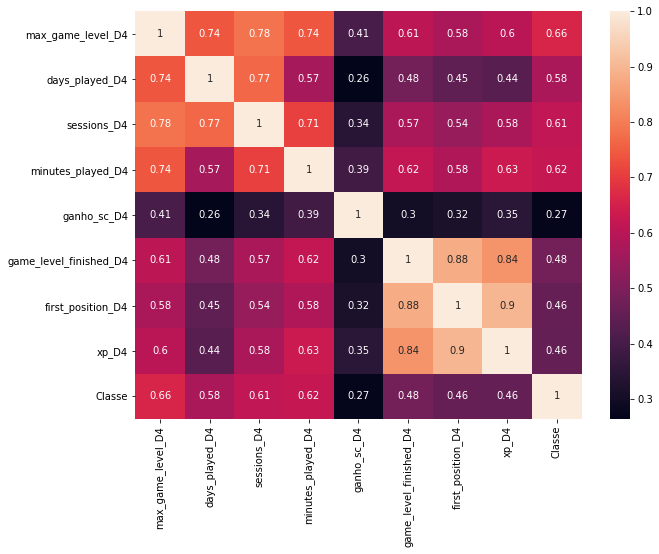

In [119]:
plt.figure(figsize=(10,7.5))
sns.heatmap(df.corr(), annot=True)

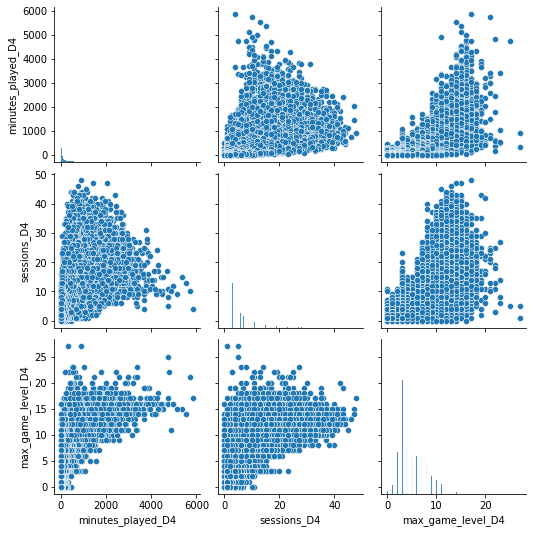

In [120]:
sns.pairplot(data=df, vars=['minutes_played_D4', 'sessions_D4', 'max_game_level_D4'])

In [121]:
labels = [0, 1]

In [122]:
subset = df.loc[df["Classe"].isin(labels),:]

<AxesSubplot:xlabel='Classe', ylabel='max_game_level_D4'>

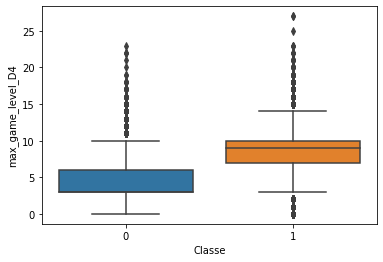

In [123]:
sns.boxplot(data=df, x="Classe", y="max_game_level_D4")

<AxesSubplot:xlabel='Classe', ylabel='sessions_D4'>

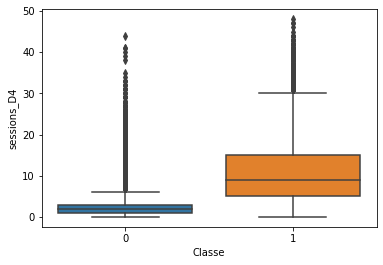

In [124]:
sns.boxplot(data=df, x="Classe", y="sessions_D4")

<AxesSubplot:xlabel='Classe', ylabel='minutes_played_D4'>

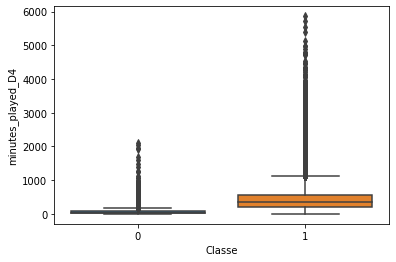

In [125]:
sns.boxplot(data=df, x="Classe", y="minutes_played_D4")

## Preparação de Dados

Nesta etapa já estamos utilizando apenas as features melhor avaliadas pela etapa de Feature Selection, removendo 3 das 8 features originais para obter um modelo mais eficiente e com menos overfitting.

In [126]:
features = ['max_game_level_D4', 
            'sessions_D4', 
            'minutes_played_D4', 
            'ganho_sc_D4',
            'xp_D4']       
target = "Classe"

In [127]:
X = subset[features]
y = subset[target]

In [128]:
X

,max_game_level_D4,sessions_D4,minutes_played_D4,ganho_sc_D4,xp_D4
0,18,9,387.90,11717463,69583
1,7,1,101.65,11707549,0
2,17,8,162.42,10993612,70249
3,10,4,151.47,10651162,18765
4,3,2,18.72,10479067,397
...,...,...,...,...,...
276501,3,4,13.33,78,0
276502,3,1,0.90,77,0
276503,3,1,0.00,50,0
276504,5,2,3.55,33,0


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, shuffle=True)

In [130]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
X_test

array([[-0.74154616, -0.63354412, -0.47859739, -0.23714827, -0.33528947],
       [-1.09498476, -0.437429  , -0.49713472, -0.25853064, -0.35401669],
       [-1.09498476, -0.63354412, -0.52970135, -0.25895466, -0.35401669],
       ...,
       [ 1.73252407,  1.91595247,  1.97540307,  0.65430908, -0.36786348],
       [-0.38810756, -0.63354412, -0.3283945 , -0.18928526, -0.24948477],
       [ 1.02564686,  0.15091637,  0.58350999,  0.09715581,  0.93577778]])

## Decision Tree

In [173]:
clf = DecisionTreeClassifier(max_depth=6)

In [174]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [175]:
y_pred_train1 = clf.predict_proba(X_train)

In [176]:
y_pred_train1

array([[0.05494505, 0.94505495],
       [0.98944795, 0.01055205],
       [0.97179377, 0.02820623],
       ...,
       [0.87907224, 0.12092776],
       [0.31370826, 0.68629174],
       [0.98944795, 0.01055205]])

In [177]:
y_pred_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     44258
           1       0.84      0.72      0.78     11044

    accuracy                           0.92     55302
   macro avg       0.89      0.84      0.86     55302
weighted avg       0.92      0.92      0.92     55302



In [179]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95    177027
           1       0.84      0.73      0.79     44177

    accuracy                           0.92    221204
   macro avg       0.89      0.85      0.87    221204
weighted avg       0.92      0.92      0.92    221204



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

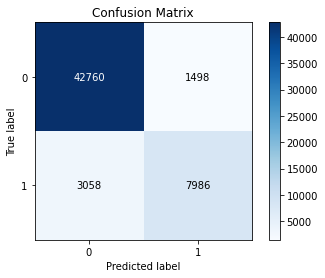

In [186]:
plot_confusion_matrix(y_test, y_pred)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

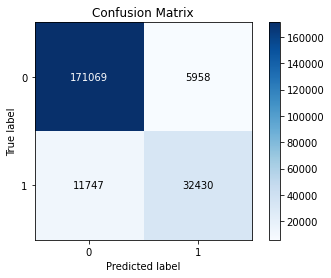

In [187]:
plot_confusion_matrix(y_train, y_pred_train)

In [188]:
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

8.23840005786409


In [189]:
mape = mean_absolute_error(y_train, y_pred_train)*100
print(mape)

8.003923979674871


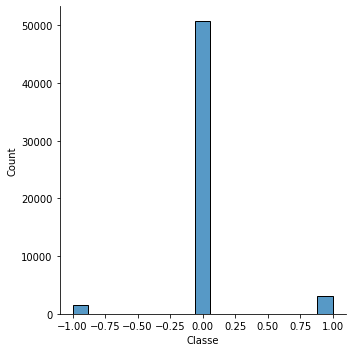

In [190]:
sns.displot(y_test - y_pred)

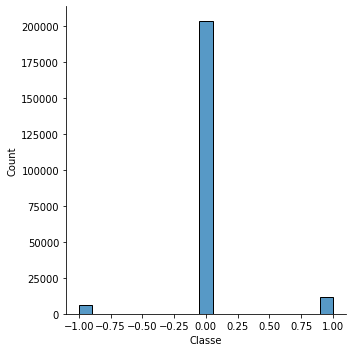

In [191]:
sns.displot(y_train - y_pred_train)

In [ ]:
# apesar do displot ser mais aplicado para avaliar modelos de Regressão Linerar, a fim de avaliar se os erros estão igualmente
# distribuídos ao redor de zero, achei interessante fazer o mesmo exercício neste modelo.

## Random Forest

In [192]:
param_grid = {"n_estimators": [25, 50, 75, 100, 125, 150, 200],
              "max_depth": [3, 5, 7, 9],
              "max_features": [.7, .8, .9, 1.0],
              "max_samples": [.8, .9, 1.0]}

clf = RandomForestClassifier(n_estimators=75, 
                             max_depth=6, 
                             max_features=.8, 
                             max_samples=.8,
                             random_state=12345)

In [193]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [194]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     44258
           1       0.86      0.71      0.78     11044

    accuracy                           0.92     55302
   macro avg       0.90      0.84      0.86     55302
weighted avg       0.92      0.92      0.92     55302



In [195]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    177027
           1       0.87      0.71      0.78     44177

    accuracy                           0.92    221204
   macro avg       0.90      0.84      0.87    221204
weighted avg       0.92      0.92      0.92    221204



In [196]:
pd.DataFrame(zip(features, clf.feature_importances_), columns=["feature","score"]).sort_values("score", ascending=False)

,feature,score
2,minutes_played_D4,0.664357
3,ganho_sc_D4,0.322544
0,max_game_level_D4,0.006596
1,sessions_D4,0.004030
4,xp_D4,0.002473


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

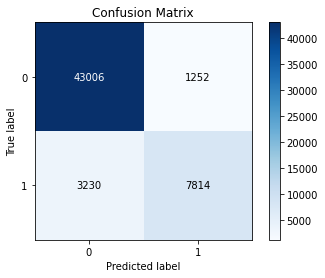

In [197]:
plot_confusion_matrix(y_test, y_pred)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

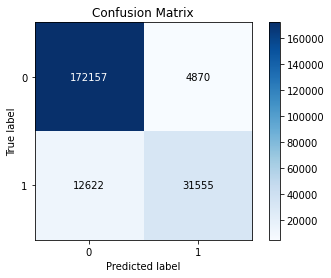

In [198]:
plot_confusion_matrix(y_train, y_pred_train)

In [199]:
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

8.104589345774112


In [200]:
mape = mean_absolute_error(y_train, y_pred_train)*100
print(mape)

7.90763277336757


## Logistic Regression

In [201]:
clf = LogisticRegression()

In [202]:
clf.fit(X_train, y_train)

LogisticRegression()

In [203]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [204]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     44258
           1       0.86      0.68      0.76     11044

    accuracy                           0.91     55302
   macro avg       0.89      0.83      0.85     55302
weighted avg       0.91      0.91      0.91     55302



In [205]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    177027
           1       0.85      0.68      0.76     44177

    accuracy                           0.91    221204
   macro avg       0.89      0.83      0.85    221204
weighted avg       0.91      0.91      0.91    221204



In [206]:
pd.DataFrame(zip(features, clf.coef_[0])).sort_values(1, ascending=False)

,0,1
2,minutes_played_D4,2.867192
0,max_game_level_D4,0.880279
4,xp_D4,0.046284
1,sessions_D4,0.007301
3,ganho_sc_D4,-0.155768


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

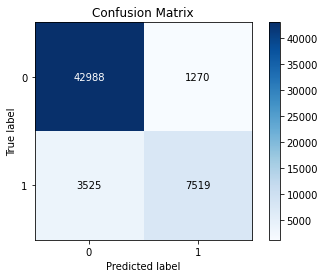

In [207]:
plot_confusion_matrix(y_test, y_pred)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

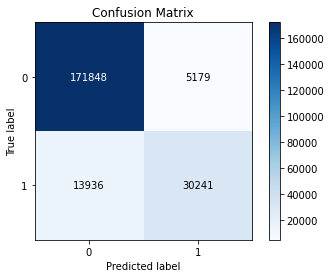

In [208]:
plot_confusion_matrix(y_train, y_pred_train)

In [209]:
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)


8.670572492857401


In [210]:
mape = mean_absolute_error(y_train, y_pred_train)*100
print(mape)

8.64134464114573


## XGBClassifier

In [132]:
clf = XGBClassifier()

In [133]:
clf.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[14:02:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
y_pred_train = clf.predict(X_train)

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     44258
           1       0.86      0.72      0.78     11044

    accuracy                           0.92     55302
   macro avg       0.90      0.85      0.87     55302
weighted avg       0.92      0.92      0.92     55302



In [136]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    177027
           1       0.88      0.74      0.80     44177

    accuracy                           0.93    221204
   macro avg       0.91      0.86      0.88    221204
weighted avg       0.93      0.93      0.93    221204



<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

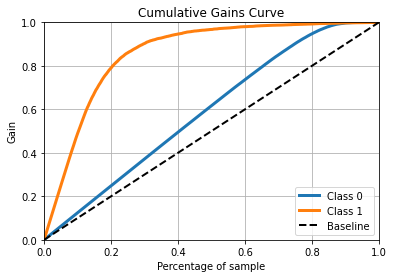

In [137]:
plot_cumulative_gain(y_test, y_pred_proba)

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

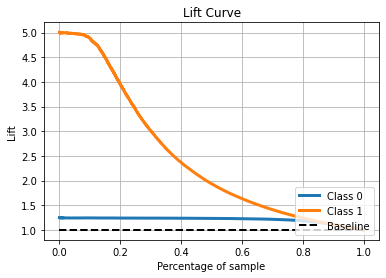

In [138]:
plot_lift_curve(y_test, y_pred_proba)

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

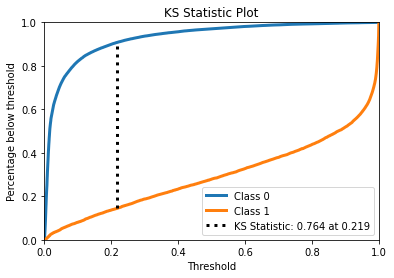

In [139]:
plot_ks_statistic(y_test, y_pred_proba)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

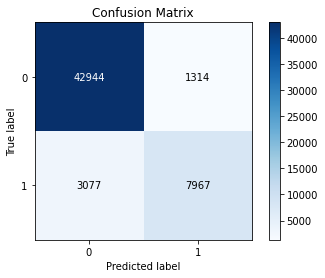

In [141]:
plot_confusion_matrix(y_test, y_pred)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

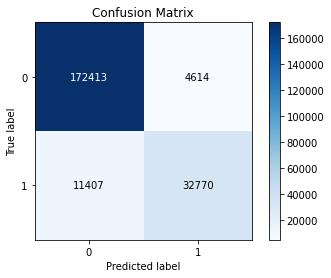

In [142]:
plot_confusion_matrix(y_train, y_pred_train)

In [143]:
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

7.940038334960761


In [144]:
mape = mean_absolute_error(y_train, y_pred_train)*100
print(mape)

7.242635757038752


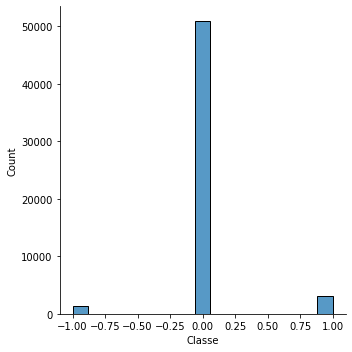

In [145]:
sns.displot(y_test - y_pred)

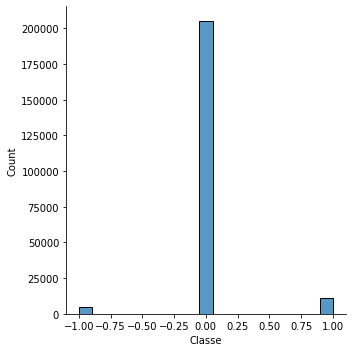

In [146]:
sns.displot(y_train - y_pred_train)

## Feature Selection

In [585]:
df.columns

Index(['device_id', 'max_game_level_D4', 'days_played_D4', 'sessions_D4',
       'minutes_played_D4', 'ganho_sc_D4', 'game_level_finished_D4',
       'first_position_D4', 'xp_D4', 'Classe'],
      dtype='object')

In [587]:
labels = [0,1]

In [588]:
subset = df.loc[df["Classe"].isin(labels),:]

In [589]:
features = ['max_game_level_D4', 
            'days_played_D4', 
            'sessions_D4',
            'minutes_played_D4', 
            'ganho_sc_D4', 
            'game_level_finished_D4',
            'first_position_D4', 
            'xp_D4']
target = "Classe"

In [590]:
X = subset[features]
y = subset[target]

In [591]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, shuffle=True)

In [592]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [797]:
lr = XGBClassifier()
rfe = RFE(estimator=lr, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)
ranking = rfe.ranking_

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:44:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:44:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:45:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:45:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:45:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [798]:
pd.DataFrame(zip(X.columns, ranking), 
             columns=["feature", "order"]).sort_values("order", ascending=True)

,feature,order
2,minutes_played_D4,1
3,ganho_sc_D4,2
0,max_game_level_D4,3
1,sessions_D4,4
4,xp_D4,5


In [595]:
selector = SelectKBest(score_func = chi2, k = 4)
fit = selector.fit(X, y)
features = fit.transform(X)

In [596]:
print('\nNúmero original de features:', X.shape[1])
print('\nNúmero reduzido de features:', features.shape[1])
print('\nFeatures (Variáveis Selecionadas): \n\n', features)


Número original de features: 8

Número reduzido de features: 4

Features (Variáveis Selecionadas): 

 [[3.8790000e+02 1.1717463e+07 8.5000000e+01 6.9583000e+04]
 [1.0165000e+02 1.1707549e+07 0.0000000e+00 0.0000000e+00]
 [1.6242000e+02 1.0993612e+07 3.3000000e+01 7.0249000e+04]
 ...
 [0.0000000e+00 5.0000000e+01 0.0000000e+00 0.0000000e+00]
 [3.5500000e+00 3.3000000e+01 0.0000000e+00 0.0000000e+00]
 [6.7700000e+00 2.0000000e+01 1.0000000e+00 0.0000000e+00]]


In [597]:
# Features selecionadas pelo chi2: minutes_played_D4, ganho_sc_D4, game_level_finished_D4, xp_D4

In [598]:
selector = SelectKBest(mutual_info_classif,k=8)
selector.fit(X_train, y_train)

SelectKBest(k=8,
            score_func=<function mutual_info_classif at 0x00000221DE18FB80>)

<AxesSubplot:>

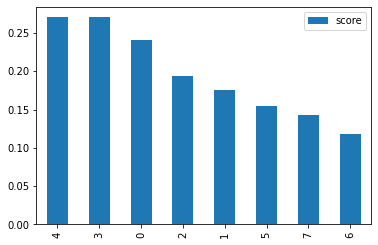

In [599]:
pd.DataFrame(zip(X.columns, selector.scores_), columns=["feature", "score"]).sort_values("score", ascending=False).plot(kind="bar")

In [600]:
# Features com melhor avaliação mutual_info_classif: minutes_played_D4, ganho_sc_D4, max_game_level_D4, sessions_D4

In [601]:
modelo = ExtraTreesClassifier()
modelo.fit(X, y)

ExtraTreesClassifier()

In [602]:
print(X.columns)
print(modelo.feature_importances_)

Index(['max_game_level_D4', 'days_played_D4', 'sessions_D4',
       'minutes_played_D4', 'ganho_sc_D4', 'game_level_finished_D4',
       'first_position_D4', 'xp_D4'],
      dtype='object')
[0.12136765 0.17329586 0.11118698 0.2433676  0.15960523 0.07166364
 0.04953826 0.06997478]


In [603]:
# Features com melhor avaliação ExtraTreesClassifier: minutes_played_D4 (25%), ganho_sc_D4 (16%), max_game_level_D4 e days_played_D4 (13%)

In [604]:
selector = SelectKBest(mutual_info_classif, k=4)
selector.fit(X_train, y_train)
X_reduced_train = selector.transform(X_train)
X_reduced_test = selector.transform(X_test)

In [605]:
model = RandomForestClassifier(max_depth=5)

In [606]:
model.fit(X_reduced_train, y_train)
y_pred = model.predict(X_reduced_test)
y_pred_train = model.predict(X_reduced_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred_train))

0.9167118729883187
0.9182519303448401


In [607]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred_train))

0.9154280134534013
0.9175693025442578


In [608]:
X_reduced_test.shape

(55302, 4)

In [609]:
X_test.shape

(55302, 8)

In [672]:
# Reduzindo o número de features de 8 para 4 o modelo ganhou um pouco mais de acurácia

## Shap - Explicabilidade do Modelo

In [55]:
X_shap = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [69]:
explainer = shap.Explainer(clf)
shap_values = explainer(X_shap)

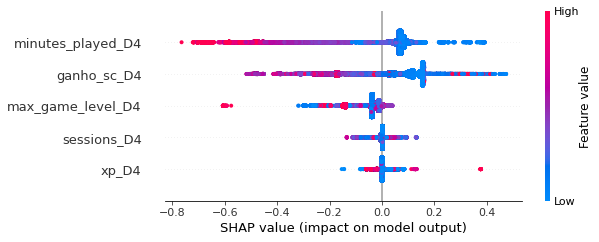

In [70]:
shap.plots.beeswarm(shap_values[:,:,0])

In [74]:
model = xgboost.XGBRegressor().fit(X, y)

In [75]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

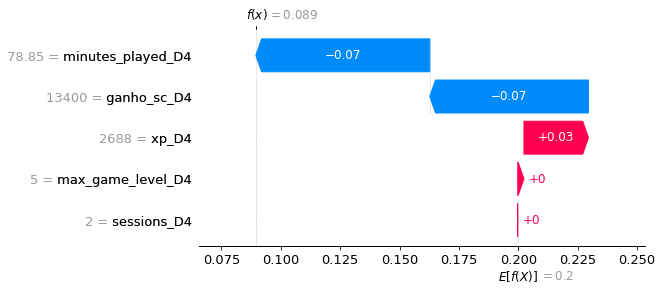

In [76]:
shap.plots.waterfall(shap_values[100000])

In [77]:
# Por algum motivo o Shap não funcionou com todos os modelos, então foi utilizado utilizado o Decision Tree para rodar o 
# Beeswarm e o XGBoost para todar o Waterfall